In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imshow
import matplotlib

# Generate artificial cells as test data

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "
c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


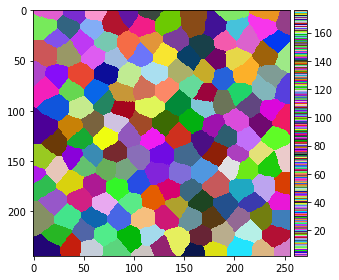

In [2]:
tissue = cle.artificial_tissue_2d()

cmap = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))
imshow(cle.pull_zyx(tissue), cmap=cmap)

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


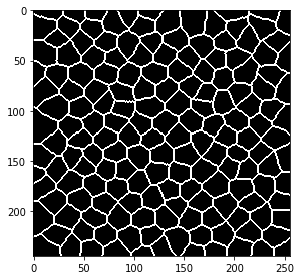

In [3]:
membranes = cle.detect_label_edges(tissue)
imshow(cle.pull_zyx(membranes))

# Analysis and visualization of neighbor count

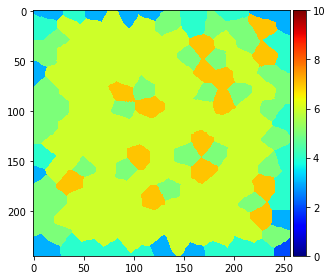

In [13]:
touch_matrix = cle.generate_touch_matrix(tissue)
neighbor_count = cle.count_touching_neighbors(touch_matrix)

parametric_image = cle.replace_intensities(tissue, neighbor_count)
imshow(cle.pull_zyx(parametric_image), vmin=0, vmax=10, cmap='jet')


## Average the measurement between cells to reduce noise
Mean of touching neighbors

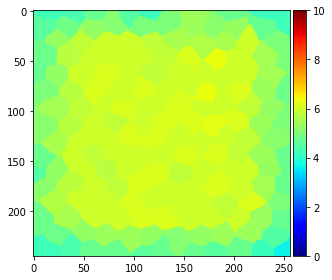

In [14]:
local_mean_neighbor_count = cle.mean_of_touching_neighbors(neighbor_count, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_mean_neighbor_count)
imshow(cle.pull_zyx(parametric_image), vmin=0, vmax=10, cmap='jet')

Median of touching neighbors

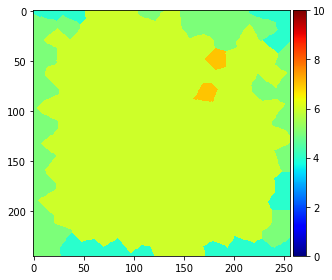

In [15]:
local_median_neighbor_count = cle.median_of_touching_neighbors(neighbor_count, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_median_neighbor_count)
imshow(cle.pull_zyx(parametric_image), vmin=0, vmax=10, cmap='jet')

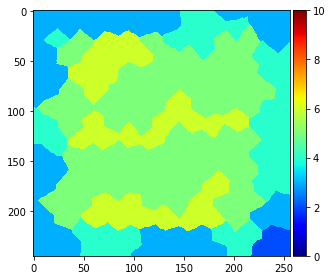

In [16]:
local_minimum_neighbor_count = cle.minimum_of_touching_neighbors(neighbor_count, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_minimum_neighbor_count)
imshow(cle.pull_zyx(parametric_image), vmin=0, vmax=10, cmap='jet')